# Compute the bayesian upper limit for a gaussian near the physical boundary

theta_obs numerator denominator Ratio limit
-4.000000 0.000030 0.000032 0.950079 0.660000
-3.733333 0.000090 0.000094 0.950208 0.697000
-3.466667 0.000250 0.000263 0.950162 0.737000
-3.200000 0.000653 0.000687 0.950064 0.781000
-2.933333 0.001593 0.001677 0.950002 0.830000
-2.666667 0.003639 0.003830 0.950031 0.885000
-2.400000 0.007789 0.008198 0.950173 0.947000
-2.133333 0.015628 0.016449 0.950086 1.015000
-1.866667 0.029429 0.030974 0.950124 1.092000
-1.600000 0.052065 0.054799 0.950096 1.178000
-1.333333 0.086662 0.091211 0.950124 1.275000
-1.066667 0.135912 0.143061 0.950025 1.383000
-0.800000 0.201272 0.211855 0.950045 1.505000
-0.533333 0.282061 0.296901 0.950017 1.641000
-0.266667 0.375148 0.394863 0.950071 1.793000
0.000000 0.475002 0.500000 0.950004 1.960000
0.266667 0.574901 0.605137 0.950034 2.144000
0.533333 0.668002 0.703099 0.950083 2.344000
0.800000 0.748771 0.788145 0.950042 2.558000
1.066667 0.814162 0.856939 0.950082 2.786000
1.333333 0.863434 0.908789 0.950093 3.025

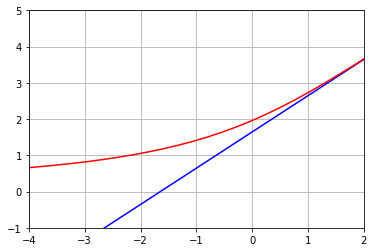

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Resolution
sigma_thetahat = 1.0

confidenceinterval = 0.95

def denominator(mu):  
    return 1-norm.cdf(0, mu, sigma_thetahat)

def numerator(mu, up):
    return norm.cdf(up, mu, sigma_thetahat) - norm.cdf(0, mu, sigma_thetahat) 

prob_left  = 1 - confidenceinterval

theta_min =  -4.0
theta_max =   4.0

theta_obsmin = -4.0
theta_obsmax = 4.0

thetas  = [] # array to collect the scanned theta
lbounds = [] # array to collect the left bounds
bbounds = [] # bayesian bounds

nsteps = 30
step = 0.2

print ("theta_obs", "numerator", "denominator", "Ratio", "limit")
for i in range(nsteps+1):    
    
    theta = theta_min + i/nsteps*(theta_max-theta_min)
    thetas.append(theta)
    
    # upper limit
    left_bound  = norm.ppf(prob_left, loc=theta, scale=sigma_thetahat)
    # print (theta, left_bound, right_bound)
    lbounds.append(left_bound)

    # bayesian upper limit: solve numerically to find the upper limit
    up = 0.001    
    scanstep = 0.001
    while (numerator(theta,up)/denominator(theta) < confidenceinterval) and (up < theta+5) :
        # print (numerator(theta,up), denominator(theta), numerator(theta,up)/denominator(theta), up)
        up+=scanstep    
    stringa = "{:.6f}".format(theta) + " {:.6f}".format(numerator(theta,up)) + " {:.6f}".format(denominator(theta)) + " {:.6f}".format(numerator(theta,up)/denominator(theta)) + " {:.6f}".format(up) 
    print (stringa)
    bbounds.append(up)
    
    
plt.plot(lbounds,thetas, 'b-')
plt.plot(thetas,bbounds, 'r-')
plt.axis([-4,2,-1,5])
plt.xticks(np.arange(-4,3, 1.0))
plt.yticks(np.arange(-1,6, 1.0))

plt.grid()
plt.show()



0.9772498680518208


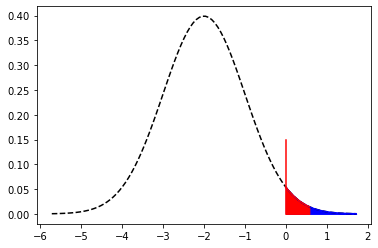

In [25]:
# Example plot to show the ratio Num / Den
mu = -2
sigma = 1
x1 = np.linspace(norm.ppf(0.0001,mu, sigma), norm.ppf(0.9999,mu, sigma), 100)
x2 = np.linspace(norm.ppf(norm.cdf(0,mu, sigma),mu, sigma), norm.ppf(0.9999,mu, sigma),100)
x3 = np.linspace(norm.ppf(norm.cdf(0,mu, sigma),mu, sigma), norm.ppf(0.995,mu, sigma),100)
y1 = norm.pdf(x1,mu, sigma)
y2 = norm.pdf(x2,mu, sigma)
y3 = norm.pdf(x3,mu, sigma)
print(norm.cdf(0,mu, sigma))
plt.plot(x1, y1,'k--')
plt.plot(x2, y2,'b-')
plt.plot(x3, y3,'r-')
p1x = np.array([0,0])
p1y = np.array([0,0.15])
plt.plot(p1x, p1y, color='r' )
plt.fill_between(x2,y2,color='b')
plt.fill_between(x3,y3,color='r')
